In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from geopy.distance import geodesic
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Concatenate, Normalization

In [10]:
# Gathering Data
data = pd.read_csv('https://raw.githubusercontent.com/anisimnida/Spin-Cycle/main/machine-learning/cleaned%20data/laundry.csv')
data

,ID Laundry,Name,Fulladdress,Categories,phone,Review Count,Average Rating,Review URL,Google Maps URL,Latitude,Longitude,Website,Opening Hours,Featured Image,Layanan
0,1,Laundryklin Sudirman ( Laundry Antar Jemput Ba...,"Jl. Jend. Sudirman No.486, Ciroyom, Kec. Andir...",Layanan Binatu,+62 851-7335-8871,151,4.8,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=94604019837086...,-6.918552,107.586449,NaN,"Sabtu: [07.00-21.00], Minggu: [07.00-21.00], S...",https://lh5.googleusercontent.com/p/AF1QipMUOc...,"just wash, dry cleaning, iron wash"
1,2,The Laundry Room,"Jl. Ciroyom No.95/77, Dungus Cariang, Kec. And...",Layanan Binatu,+62 22 20562320,3,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=11162829296077...,-6.909928,107.580838,https://www.instagram.com/the.laundry.room.ban...,"Sabtu: [Buka 24 jam], Minggu: [Buka 24 jam], S...",https://lh5.googleusercontent.com/p/AF1QipOt-O...,"just wash, dry cleaning, iron wash"
2,3,Nadhif Laundry ciroyom bandung,"Gg. Sastra No.272/78, Dungus Cariang, Kec. And...",Binatu,+62 22 6036296,6,4.7,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=16206958779682...,-6.915349,107.585807,NaN,"Sabtu: [08.00-20.00], Minggu: [08.00-20.00], S...",https://lh5.googleusercontent.com/p/AF1QipPN10...,"just wash, iron wash"
3,4,Laundry Club Rajawali,"Jl. Rajawali Barat No.25, Garuda, Kec. Andir, ...",Layanan Binatu,+62 851-7324-7944,33,4.9,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=10211050715543...,-6.911077,107.570868,https://bit.ly/customer_laundryclub_rajawali,"Sabtu: [07.00-20.00], Minggu: [09.00-17.00], S...",https://lh5.googleusercontent.com/p/AF1QipMERU...,"just wash, dry cleaning, iron wash"
4,5,EZpress Home Laundry,"Jl. Durman No.4, Kb. Jeruk, Kec. Andir, Kota B...",Layanan Binatu,+62 823-2020-9878,50,4.2,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=89067263696846...,-6.919917,107.599841,NaN,"Sabtu: [07.00-18.00], Minggu: [Tutup], Senin: ...",https://lh5.googleusercontent.com/p/AF1QipOy4x...,"just wash, dry cleaning, iron wash"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1222,Vanili Laundry,"Jl. Vanili Raya No.99, Mangga, Kec. Medan Tunt...",Layanan Binatu,NaN,1,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=13474658465171...,3.508912,98.632010,0,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,"just wash, dry cleaning, iron wash"
1222,1223,Laundry The Daily Wash dr.mansur,"Jl. Dr. Mansyur No.27, Padang Bulan Selayang I...",Binatu,NaN,16,4.3,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=91915042862606...,3.567332,98.651193,0,NaN,https://lh5.googleusercontent.com/p/AF1QipPZbY...,"just wash, iron wash"
1223,1224,Tetanggamu Laundry,"Jl. Prof. H. M. Yamin No.17b, Perintis, Kec. M...","Binatu, Binatu Cucian Kering",+62 812-6511-5252,71,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=17346466435953...,3.594387,98.680243,0,"Minggu: [08.30-19.00], Senin: [08.30-19.00], S...",https://lh5.googleusercontent.com/p/AF1QipN-8x...,"just wash, dry cleaning, iron wash"
1224,1225,Mutiara Laundry Express Powered By DEXTER,"Jl. Arief Rahman Hakim No.136, RT.02, Ps. Mera...",Binatu,NaN,9,4.6,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=33600404797552...,3.571973,98.703399,0,"Minggu: [09.00-22.00], Senin: [09.00-22.00], S...",https://lh5.googleusercontent.com/p/AF1QipMi-K...,"just wash, iron wash"


In [11]:
data.isna().sum()

ID Laundry           0
Name                 0
Fulladdress          2
Categories           0
phone              131
Review Count         0
Average Rating       0
Review URL          24
Google Maps URL      0
Latitude             0
Longitude            0
Website            760
Opening Hours      102
Featured Image       8
Layanan              3
dtype: int64

In [12]:
data = data.fillna('None')
data.isna().sum()

ID Laundry         0
Name               0
Fulladdress        0
Categories         0
phone              0
Review Count       0
Average Rating     0
Review URL         0
Google Maps URL    0
Latitude           0
Longitude          0
Website            0
Opening Hours      0
Featured Image     0
Layanan            0
dtype: int64

In [13]:
# keyword untuk 'express'
keyword = 'pres'

# memfilter laundry yang melayani laundry 'express'
data_express = data[data['Name'].str.contains(keyword, na=False)]

# print hasil
print('Data Laundry Expresss: ')
data_express


Data Laundry Expresss: 


,ID Laundry,Name,Fulladdress,Categories,phone,Review Count,Average Rating,Review URL,Google Maps URL,Latitude,Longitude,Website,Opening Hours,Featured Image,Layanan
4,5,EZpress Home Laundry,"Jl. Durman No.4, Kb. Jeruk, Kec. Andir, Kota B...",Layanan Binatu,+62 823-2020-9878,50,4.2,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=89067263696846...,-6.919917,107.599841,None,"Sabtu: [07.00-18.00], Minggu: [Tutup], Senin: ...",https://lh5.googleusercontent.com/p/AF1QipOy4x...,"just wash, dry cleaning, iron wash"
12,13,Dokter Clean Cibadak | Laundry Express Bandung...,"Jl. Cibadak No.213-227, Cibadak, Kec. Astanaan...",Layanan Binatu,+62 812-8884-9393,171,4.9,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=68530289258672...,-6.921087,107.595564,None,"Sabtu: [07.00-21.00], Minggu: [07.00-21.00], S...",https://lh5.googleusercontent.com/p/AF1QipP_0o...,"just wash, dry cleaning, iron wash"
26,27,Briwash Laundry Express - Antapani,"Jl. Sukanagara No.95, Antapani Kidul, Kec. Ant...",Binatu,+62 851-7971-6134,48,4.9,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=11042148801437...,-6.922001,107.661603,https://briwash.id/,"Sabtu: [07.00-20.00], Minggu: [07.00-20.00], S...",https://lh5.googleusercontent.com/p/AF1QipNdtt...,"just wash, iron wash"
31,32,Neng Laundry Express Arcamanik Bandung - Laund...,"Jl. Arcamanik Endah No.87 Blok C, Sukamiskin, ...",Binatu,+62 813-1250-4752,34,4.5,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=17147003429593...,-6.918708,107.674724,https://nenglaundry.com/,"Sabtu: [06.00-21.00], Minggu: [06.00-21.00], S...",https://lh5.googleusercontent.com/p/AF1QipPlVV...,"just wash, iron wash"
35,36,Gwash Laundry Express Cingised,"Jl. Cingised, Cisaranten Endah, Kec. Arcamanik...",Binatu,+62 811-2346-164,22,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=45898088081866...,-6.927691,107.671384,None,"Sabtu: [07.00-20.00], Minggu: [07.00-20.00], S...",https://lh5.googleusercontent.com/p/AF1QipN5jw...,"just wash, iron wash"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1173,Laundry Express Hijrah Laundry Medan,"Jl. Sekip No.66, Sekip, Kec. Medan Petisah, Ko...",Layanan Binatu,+62 822-8263-9035,25,4.8,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=11352930352441...,3.598435,98.663864,0,"Minggu: [07.00-21.00], Senin: [07.00-21.00], S...",https://lh5.googleusercontent.com/p/AF1QipOpJM...,"just wash, dry cleaning, iron wash"
1183,1184,Express Laundry,"Jl. Karya Bakti II No.68, Sari Rejo, Kec. Meda...",Binatu Cucian Kering,None,3,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=13428257942094...,3.544012,98.665319,0,"Minggu: [Tutup], Senin: [08.00-20.00], Selasa:...",https://lh5.googleusercontent.com/p/AF1QipPew7...,"just wash, dry cleaning, iron wash"
1192,1193,FR Laundry Expres No.77,"HJPC+5GJ, Sunggal, Kec. Medan Sunggal, Kota Me...",Binatu,+62 812-6005-1919,2,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=17058049892257...,3.585452,98.621274,0,None,https://lh5.googleusercontent.com/p/AF1QipNzag...,"just wash, iron wash"
1210,1211,QQ Laundry Express,"jln pukat 8, simpang Gg. Sadar No.58, Kota Med...",Layanan Binatu,+62 812-6509-2915,41,5.0,https://search.google.com/local/reviews?placei...,https://www.google.com/maps?cid=27515292805170...,3.589034,98.708755,0,"Minggu: [08.00-19.00], Senin: [08.00-20.00], S...",https://lh5.googleusercontent.com/p/AF1QipMoK0...,"just wash, dry cleaning, iron wash"


Model Tensorflow: Laundry Express

In [15]:
def prepare_data(data_express, user_location):
    # menambahkan fitur jarak ke lokasi pengguna
    data_express['Distance'] = data_express.apply(lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).km, axis=1)

    # membuat fitue dan label
    features = data_express[['Latitude', 'Longitude', 'Distance']]
    labels = data_express['Average Rating']

    # split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # normalisasi
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [16]:
def build_model():
    # Input layer
    latitude_input = Input(shape=(1,), name='latitude')
    longitude_input = Input(shape=(1,), name='longitude')
    distance_input = Input(shape=(1,), name='distance')

    # Menggabungkan input
    concatenated = Concatenate()([latitude_input, longitude_input, distance_input])

    # Normalize the concatenated inputs
    normalizer = Normalization()
    normalizer.adapt(np.array([[0, 0, 0], [1, 1, 1]]))  # Dummy data to adapt normalizer

    # Membangun model neural network
    x = Dense(256, activation='relu')(concatenated)
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(concatenated)
    x = Dense(32, activation='relu')(x)
    output = Dense(1, activation='linear')(x)

    # Model
    model = Model(inputs=[latitude_input, longitude_input, distance_input], outputs=output)
    model.compile(optimizer='adam', loss='mse')  # Use MSE as the loss function

    return model

In [17]:
def train_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    # Membuat dataset TensorFlow dengan dua input terpisah
    def split_lat_lon_distance(features, label):
        latitude = features[0]
        longitude = features[1]
        distance = features[2]
        return {'latitude': latitude, 'longitude': longitude, 'distance': distance}, label

    # Membuat dataset dengan map function untuk memisahkan latitude dan longitude
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train.values))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train_scaled)).map(split_lat_lon_distance).batch(32)

    test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test.values))
    test_dataset = test_dataset.map(split_lat_lon_distance).batch(32)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Melatih model
    history = model.fit(train_dataset, epochs=200, validation_data=test_dataset, callbacks=[early_stopping])

    # Evaluasi model
    loss = model.evaluate(test_dataset)
    print('Test Loss:', loss)

    # Prediksi
    y_pred = model.predict(test_dataset).flatten()  # Pastikan bentuknya sesuai
    # Menghitung metrik tambahan
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)

    return history

In [19]:
def save_model(model, filename):
    model.save(filename)

def main(data_express, user_location):
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(data_express, user_location)
    model = build_model()
    history = train_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    save_model(model, 'model_Express.h5')
    return model, history

user_location = (-6.266383404321731, 106.92144906171373)
model, history = main(data_express, user_location)

<ipython-input-15-cc0a2bbcccb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_express['Distance'] = data_express.apply(lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).km, axis=1)


Epoch 1/200
3/3 [==============================] - 2s 78ms/step - loss: 22.6181 - val_loss: 21.9476
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 22.0696 - val_loss: 21.4066
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 21.5354 - val_loss: 20.8762
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 21.0017 - val_loss: 20.3546
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 20.4838 - val_loss: 19.8151
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 19.9389 - val_loss: 19.2373
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 19.3478 - val_loss: 18.6349
Epoch 8/200
3/3 [==============================] - 0s 16ms/step - loss: 18.7508 - val_loss: 17.9952
Epoch 9/200
3/3 [==============================] - 0s 26ms/step - loss: 18.1072 - val_loss: 17.3348
Epoch 10/200
3/3 [==============================] - 0s 15ms/step - loss: 17.4350 - val_loss: 16.6453

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


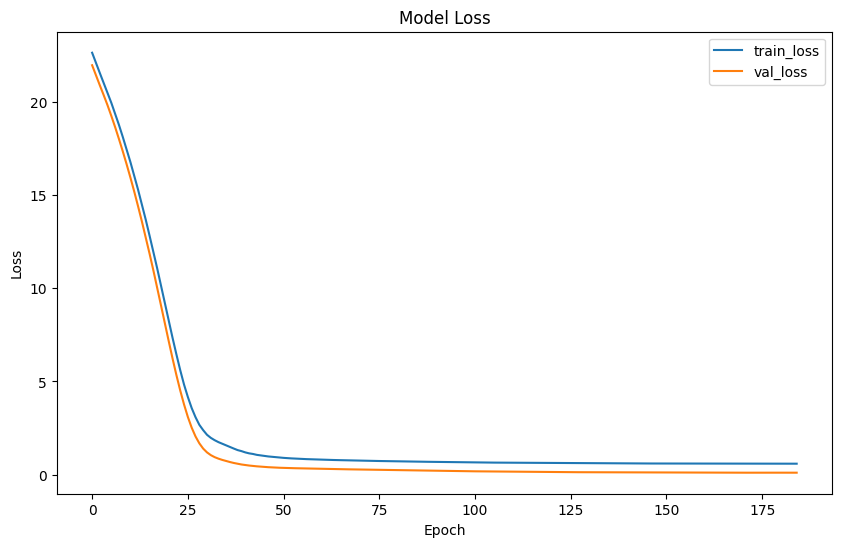

In [20]:
# Load the saved model
model = load_model("model_Express.h5")

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [21]:
# Menjalankan Model_Express.h5
# Fungsi Haversine
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

def find_nearest_places(data_express, user_location, model_path):
    model = load_model(model_path)

    # Menghitung jarak dari lokasi pengguna ke setiap tempat
    data_express.loc[:, 'Distance'] = data_express.apply(lambda row: haversine(user_location[1], user_location[0], row['Longitude'], row['Latitude']), axis=1)

    # Menyusun tempat berdasarkan prediksi rating dan jarak
    recommended_places = data_express.sort_values(by=['Distance'], ascending=[True])

    # Membatasi hasil menjadi 10 tempat terdekat
    top_10_places = recommended_places.head(10)

    return top_10_places

def print_nearest_places(nearest_places, user_location):
    selected_columns = ['Name', 'Fulladdress', 'Categories', 'phone', 'Average Rating', 'Distance', 'Google Maps URL','Website', 'Opening Hours', 'Layanan']

    # Filter tempat yang berada dalam jarak 500 km
    nearest_places_within_50km = nearest_places[nearest_places['Distance'] <= 50]

    if nearest_places_within_50km.empty:
        print("Tidak ada tempat laundry yang ditemukan")
        return

    for index, row in nearest_places.iterrows():
      print(f"Nama Laundry: {row['Name']}")
      print(f"Alamat Lengkap: {row['Fulladdress']}")
      print(f"Telepon: {row['phone']}")
      print(f"Rating: {row['Average Rating']}")
      print(f"Jarak: {row['Distance']:.2f} km")
      print(f"Google Maps URL: {row['Google Maps URL']}")
      print(f"Website: {row['Website']}")
      print(f"Jam Buka: {row['Opening Hours']}")
      print(f"Layanan: {row['Layanan']}")
      print("\n")

# Contoh penggunaan fungsi
user_location = np.array([-6.266383404321731, 106.92144906171373])
nearest_places_sorted = find_nearest_places(data_express, user_location, "model_Express.h5")
print_nearest_places(nearest_places_sorted, user_location)

Nama Laundry: Bubbleklin Laundry Cililitan Besar, Laundry Ekspress Cililitan, Laundry Sepatu, 
Alamat Lengkap: Jl. Tj. Raya, RT.3/RW.3, Cililitan, Kec. Kramat jati, Kota Jakarta Timur, Daerah
Telepon: +62 896-7733-6858
Rating: 4.9
Jarak: 5.64 km
Google Maps URL: https://www.google.com/maps?cid=11960076589193681822
Website: None
Jam Buka: Minggu: [08.00-20.00], Senin: [08.00-20.00], Selasa: [08.00-20.00], Rabu: [08.00
Layanan: just wash, dry cleaning, iron wash


Nama Laundry: Bubbleklin Laundry Batu Ampar I Laundry Exspress jakarta Timur I Laundry Strolle
Alamat Lengkap: 11, Jl. Batu Ampar 3 No.5, RT.11/RW.4, Batu Ampar, Kec. Kramat jati, Daerah Khus
Telepon: +62 896-7733-6857
Rating: 4.8
Jarak: 6.80 km
Google Maps URL: https://www.google.com/maps?cid=6834984309965394393
Website: None
Jam Buka: Minggu: [08.00-21.00], Senin: [06.30-21.00], Selasa: [06.30-21.00], Rabu: [06.30
Layanan: just wash, dry cleaning, iron wash


Nama Laundry: Hazez Laundry Express Jakarta 24
Alamat Lengkap: Jl. 